In [6]:
import pandas as pd
import numpy as np
import seaborn as sns


In [18]:
df=pd.read_csv("D:\kunal_cdac_blr_notes\Regression.csv")
df1=df.copy()

In [20]:
df1

,name,f1,f2,f3,f4,Taget
0,a,10,80,0,20,130
1,b,20,90,10,0,150
2,c,0,20,50,50,160
3,d,50,0,20,10,120
4,e,65,94,19,28,195
5,f,80,25,32,58,200
6,g,25,64,95,55,230
7,h,85,28,62,56,180
8,i,40,40,49,12,170
9,j,20,20,87,80,250


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    26 non-null     object
 1   f1      26 non-null     int64 
 2   f2      26 non-null     int64 
 3   f3      26 non-null     int64 
 4   f4      26 non-null     int64 
 5   Taget   26 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB


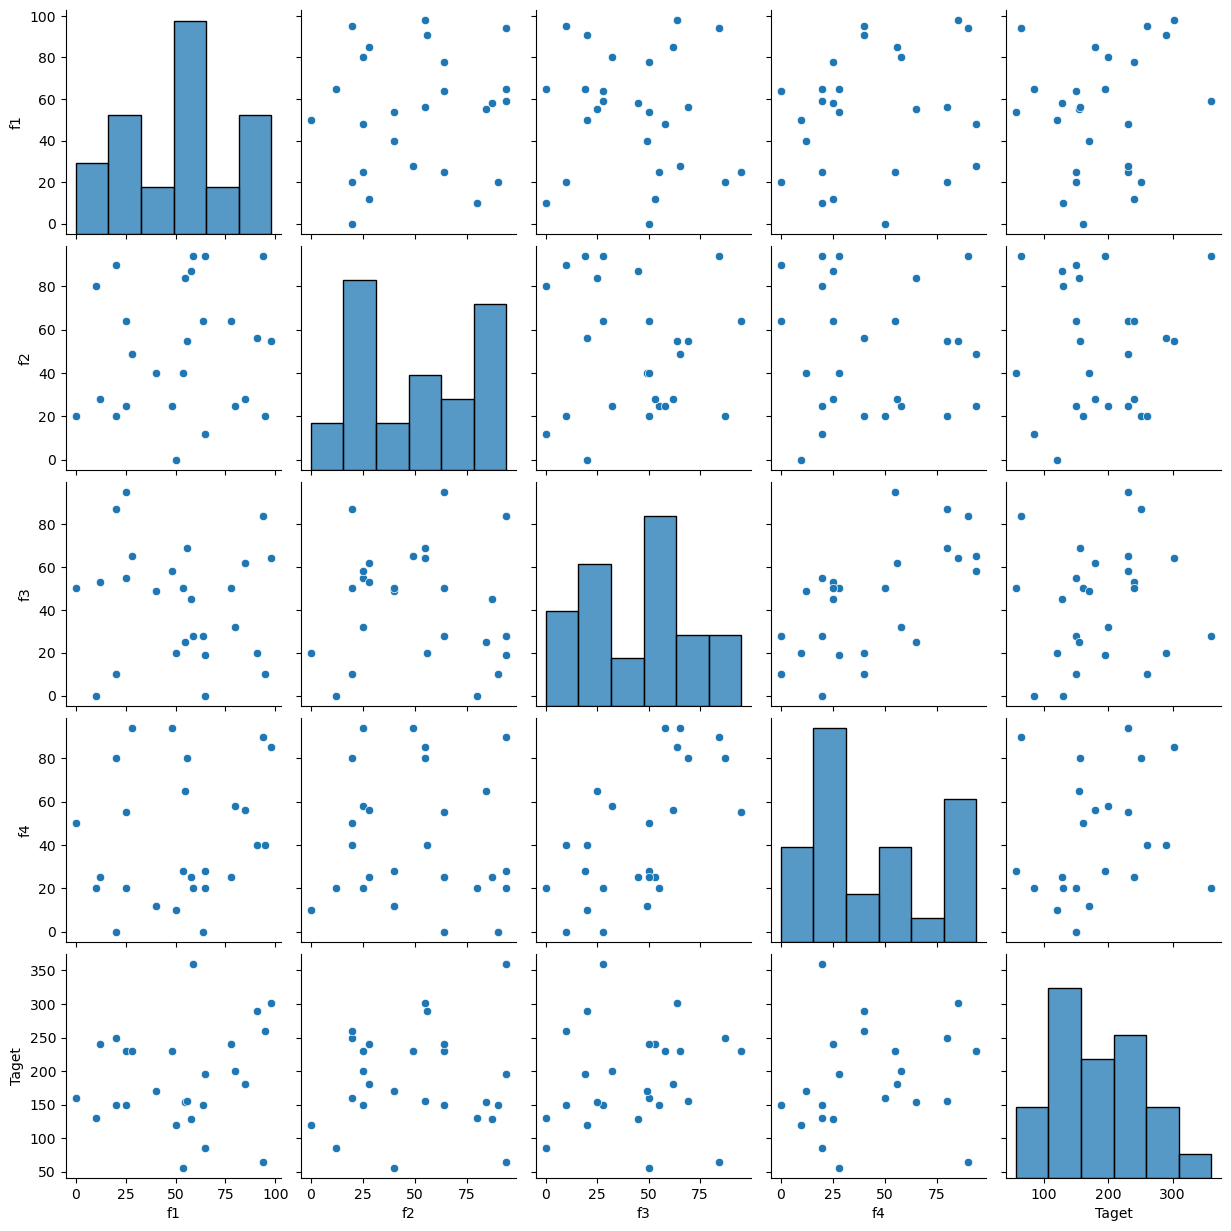

In [24]:
#find the linearity
sns.pairplot(df1)

C:\Users\kunal\AppData\Local\Temp\ipykernel_30892\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

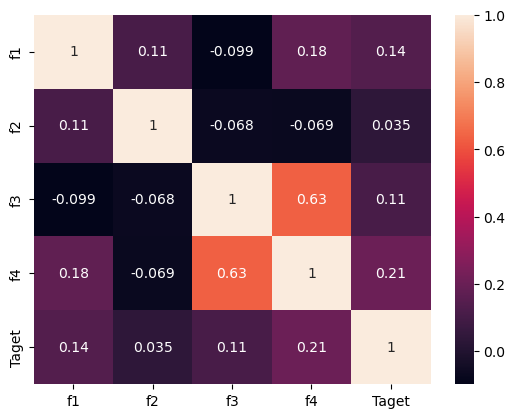

In [26]:
sns.heatmap(df.corr(),annot=True)

In [218]:
#divide into X and Y
x=np.array(df['f4']).reshape(-1,1)
y=np.array(df['Taget']).reshape(-1,1)

In [220]:
x.shape


(26, 1)

In [222]:
x.shape

(26, 1)

In [224]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [226]:
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [281]:
test=np.array([50,80,94,25,0,10]).reshape(-1, 1)
Actual=np.array([160,250,230,128,150,120]).reshape(-1,1)
ypred=model.predict(test).flatten()

In [287]:
data=pd.DataFrame({"Test":test.flatten(),"Actual":Actual.flatten(),"ypred":ypred.flatten(),"Residual":(test-Actual).flatten()})

In [289]:
data

,Test,Actual,ypred,Residual
0,50,160,191.237539,-110
1,80,250,206.433541,-170
2,94,230,213.525008,-136
3,25,128,178.574204,-103
4,0,150,165.910869,-150
5,10,120,170.976203,-110


In [291]:
data["sqrt_residual"]=data["Residual"]**2

In [293]:
data

,Test,Actual,ypred,Residual,sqrt_residual
0,50,160,191.237539,-110,12100
1,80,250,206.433541,-170,28900
2,94,230,213.525008,-136,18496
3,25,128,178.574204,-103,10609
4,0,150,165.910869,-150,22500
5,10,120,170.976203,-110,12100


In [295]:
Rss=data['sqrt_residual'].sum()
Rss

104705

In [297]:
ybar=data['Actual'].mean()

In [299]:
data["preTss"]=(data["Actual"]-ybar)**2

In [301]:
data

,Test,Actual,ypred,Residual,sqrt_residual,preTss
0,50,160,191.237539,-110,12100,169.0
1,80,250,206.433541,-170,28900,5929.0
2,94,230,213.525008,-136,18496,3249.0
3,25,128,178.574204,-103,10609,2025.0
4,0,150,165.910869,-150,22500,529.0
5,10,120,170.976203,-110,12100,2809.0


In [303]:
Tss=data["preTss"].sum()

In [305]:
Tss

14710.0

In [307]:
r=1-(Rss/Tss)

In [309]:
r


-6.117946974847043

In [311]:
r2_score(test,ypred)

-16.476639687042233

with machine leaning model

In [314]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=50)

In [316]:
model.coef_

array([[0.5065334]])

In [318]:
model.intercept_

array([165.91086898])

In [344]:
y=0.50*50+165

In [346]:
y

190.0

In [338]:
ypred=model.predict(x_test)
ypred

array([[165.91086898],
       [171.98926976],
       [213.52500846],
       [206.43354087],
       [178.57420395],
       [198.83553989],
       [180.09380414],
       [178.57420395]])

In [326]:
train=model.score(x_train,y_train)

In [328]:
train

-0.01133378103082694

In [332]:
test1=model.score(x_test,y_test)

In [334]:
test1

0.13570540394307762

In [342]:
r2_score(y_test,ypred)

0.13570540394307762